# Finding a Battery Cell's Usable Capacity



----
## Background: 
Have you ever had a phone go from 20% Charge to empty in a manner of minutes? What about a laptop that started to die on you during an exam or important event? These issues are directly related to the power and capacity of the batteries our equipment uses. 

The capacity is the amount of energy that can be stored in a battery. When a battery is made, it starts with a specific energy storage capacity, but over time the battery's capacity reduces. This can be caused by a myriad a factors like undesirable chemical reactions, or overcharging the battery. For example, when we overcharge a battery it can cause lithium deposition at the negative electrode.[1] When this happens, lithium transitions from liquid-phase solution to a solid-phase and effectively becomes a resistor that limits the battery's ability to efficiently charge or discharge. 

It's important to monitor battery capacity, because how quickly the capacity fades over time can determine whether or not the battery should be used in a phone, emergency power source, drill, or other application. Manufacturers might also  monitor capacity to check if initial battery quality is meeting desired tolerances for production. Since battery capacity changes over time, monitoring the capacity can also be a great way to assess for defects or battery degredation over time.   
Now, there are many ways to approximate battery capacity, but a common method to do this is coulomb counting. [2] 



----
## Coulomb Counting:
Coulomb counting is a way to approximate a cell's usable capacity. 

Mathematically, we can calculate the energy that has passed through the battery by integrating the current that has passed through the battery with respect to time, as shown in the following equation: 


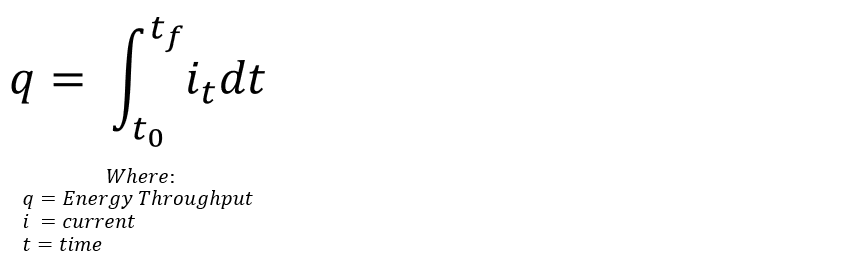


Now knowing the math is important, but how do we do this in a live test? Well, to measure a battery's capacity by Coulomb counting we want to bring the battery's state of charge (SOC) down to it's nominal zero point. Then, we supply current through the battery until we've reached the battery's nominal full state of charge. We repeat the process going from nominal full state of charge down to our nominal zero point. This allows us to capture the efficiency of the battery (how much stored energy can we get out relative to what we put in). 

Now, we mentioned nominal full SOC and nominal zero point. The reason for this nuance is because at these conditions we probably aren't at the true fully charged or discharged state of the battery, since lithium tends to get trapped on either side, and extracting that marginal amount of lithium could significantly damage the positive or negative electrodes in the battery. In other words, the charge you see on a phone's battery icon is not the battery's physical 100% or 0% SOC. 

Instead, the SOC you see on an phone, laptop, or EV dashboard comes these nominal voltages, which are generally provided as recommendations from battery manufacturers, where they've found that these voltages ensure adequate level of battery performance for the customers needs, like maintaining a certain level of capacity retention for a period of time. 


Now, let's dive in to an example. With some public battery cycling data from NASA. [3]


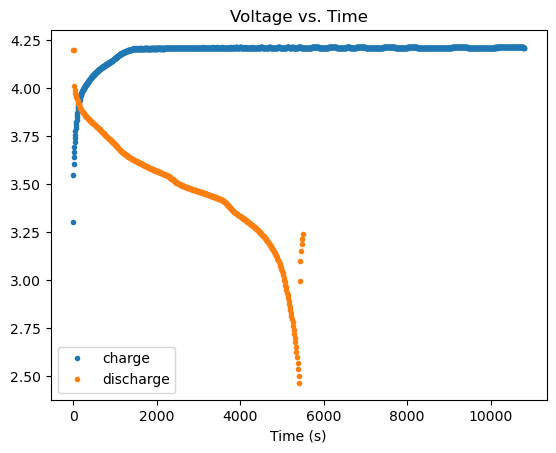

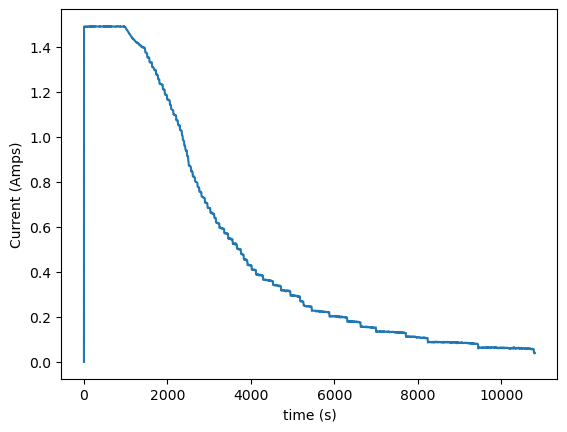

In [2]:
#Coulomb Counting Example 

#Import boilerplate
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Load datasets
path = r'C:\Users\ldsjo\Youtube Training Videos\Coulomb Counting\data'
df_charge = pd.read_csv(path + '\\' + "charge.csv")
df_discharge = pd.read_csv(path + '\\' + "discharge.csv")
    
#extract desired variables from the dataframe 
current_charge = df_charge["Current_measured"]
voltage_charge = df_charge["Voltage_measured"]
time_charge = df_charge["Time"]

current_discharge = df_discharge["Current_measured"]
voltage_discharge = df_discharge["Voltage_measured"]
time_discharge = df_discharge["Time"]

#Plot the data 
plt.plot(time_charge, voltage_charge, '.', label='charge')
plt.plot(time_discharge, voltage_discharge, '.', label='discharge')

plt.xlabel("Time (s)")
#plt.ylabel('Voltage (V)')
plt.title("Voltage vs. Time")
plt.legend()
plt.show()

plt.plot(time_charge, current_charge)
plt.xlabel("time (s)")
plt.ylabel("Current (Amps)")
plt.show()

In [4]:
#Calculate the energy passed trhough the cell across time

#Battery Charge Condition
energy_list_charge = []
throughput_charge = 0 
for i in range(len(voltage_charge)): 
    if i < len(voltage_charge) - 1: 
        energy_charge = current_charge[i] * (time_charge[i+1] - time_charge[i]) / 3600 
        energy_list_charge.append(energy_charge)
        throughput_charge += energy_charge 

#Battery Discharge Condition
energy_list_discharge = []
throughput_discharge = 0 
for i in range(len(voltage_discharge)): 
    if i < len(voltage_discharge) - 1: 
        energy_discharge = current_discharge[i] * (time_discharge[i+1] - time_discharge[i]) / 3600 
        energy_list_discharge.append(energy_discharge)
        throughput_discharge += energy_discharge 
        
#Compare Result
throughput_charge, throughput_discharge

throughput_discharge /throughput_charge

-0.9937260660950262

----
## Across Life Capacity Analysis: 

In [5]:
# First let's look at the meta datafile so we can understand the tests conducted:
df_meta = pd.read_csv(r'C:\Users\ldsjo\Youtube Training Videos\Coulomb Counting\metadata.csv')
df_meta.head(3)

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN


In [6]:
#Now we want to look at capacity across life for one battery (just to speed things up here). Let's look at the first battery
#also, we're not interested in the impedance tests here. We're going to just exclude those for now and examine then in a 
#Separate video.

battery = df_meta["battery_id"][0]
tests = ["discharge", "charge"]

#Filter metadata to find all charge/discharge files with specific battery_id
df_meta = df_meta[(df_meta["battery_id"] == battery) & (df_meta["type"].isin(tests))]

#Capture list of desired files: 
files = list(df_meta["filename"])
files

df_meta

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
5,charge,[2010. 7. 21. 22. 38. ...,4,B0047,5,6,00006.csv,NaN,NaN,NaN
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.5080762969973425,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
177,charge,[2010 8 17 2 32 20],4,B0047,177,178,00178.csv,NaN,NaN,NaN
178,discharge,[2010. 8. 17. 5. 33. ...,4,B0047,178,179,00179.csv,1.158443027293818,NaN,NaN
179,charge,[2010. 8. 17. 6. 50. ...,4,B0047,179,180,00180.csv,NaN,NaN,NaN
180,discharge,[2010. 8. 17. 9. 52. ...,4,B0047,180,181,00181.csv,1.1567087516841796,NaN,NaN


In [8]:
#Now that we've isolated the file names we're interested in, let's go ahead and read in all the data files and set them 
#to a dataframe list, this will be handy so we can iteratively calculate the throughput and capacity performance 
#at each cycle. 

import os
path = 'C:\\Users\\ldsjo\\Youtube Training Videos\\Coulomb Counting\\data\\'

#now let's set them to a master dataframe: 
df_master = pd.DataFrame() 
df_list = [pd.read_csv(os.path.join(path, file)) for file in files]
df_master = pd.concat(df_list, ignore_index=True)
#now let's check out our master dataframe.
df_master

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Current_charge,Voltage_charge
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000,NaN,NaN
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360,NaN,NaN
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281,NaN,NaN
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406,NaN,NaN
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625,NaN,NaN
...,...,...,...,...,...,...,...,...
125479,4.211567,0.062552,5.930646,NaN,NaN,10774.063,0.0632,4.263
125480,4.211716,0.061251,5.938026,NaN,NaN,10782.750,0.0632,4.263
125481,4.211562,0.063422,5.960594,NaN,NaN,10791.422,0.0632,4.263
125482,4.211579,0.061475,5.963431,NaN,NaN,10800.172,0.0632,4.263


In [9]:
# Great, now let's get our functions ready for calculating throughput. There's more efficient ways to do this, which 
# is important in large datasets, but for now, a simple function will suffice. We'll copy our looping from before. 

def throughput(df): 
    voltage = df["Voltage_measured"]
    current = df["Current_measured"]
    time = df["Time"]
    energy_list = []
    throughput = 0 
    for i in range(len(voltage)): 
        if i < len(voltage) - 1: 
            energy = current[i] * (time[i+1] - time[i]) / 3600 
            energy_list.append(energy)
            throughput += energy     
    return(throughput)

#Now let's run the calculation. We should see an alternating set of throughputs since the current sign changes between 
#charge and discharge. 

throughput_list = [throughput(df) for df in df_list]
throughput_list

[-1.7058795455094375,
 1.542414099177776,
 -1.5484803003683816,
 1.53865379673722,
 -1.5322681970993333,
 1.5223439139183141,
 -1.5115530736021856,
 1.5046127909507567,
 -1.4951729497477535,
 1.487749525548928,
 -1.4769494721658287,
 1.4682405206203686,
 -1.4740366843646566,
 1.4743395491959606,
 -1.4631055641200128,
 1.45953350978951,
 -1.4437491656626689,
 1.4378168626827823,
 -1.428303920085372,
 1.4223309190643965,
 -1.413059579540597,
 1.4076759372302967,
 -1.4011819575640194,
 1.390045902989683,
 -1.438357054909603,
 1.451221960342715,
 -1.434328160982984,
 1.4293618489309783,
 -1.4153429037461995,
 1.4072312999674041,
 -1.3991005485072723,
 1.3923455087920722,
 -1.3783968795057089,
 1.3719327754226671,
 -1.3616538439449146,
 1.3511680304023712,
 -1.3477183679040596,
 1.347134593738427,
 -0.6525331312960739,
 0.7035034692158793,
 -1.3721080582367262,
 1.3250703957013863,
 -1.3215813559835048,
 1.3157362548486393,
 -1.310750237852854,
 1.3008992486595703,
 -1.2968497901247489,
 1.

72 72 72


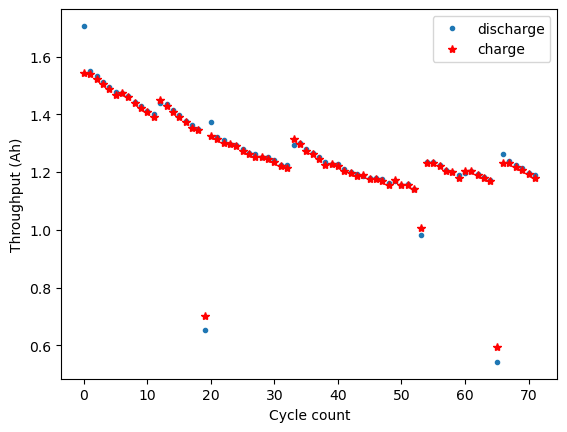

In [11]:
#now let's split this into charge and discharge, we should get an even match of both. 
discharge_throughput = throughput_list[::2]
charge_throughput = throughput_list[1::2]

#let's add a cycle count list, and plot these across time, and confirm we get matching charge/discharge test qty. 
cycle = [i for i in range(len(discharge_throughput))]
print(len(charge_throughput), len(discharge_throughput), len(cycle))

#We're also going to change sign so it is consistent for plotting 
discharge_throughput = [-val for val in discharge_throughput]

#Okay now let's plot our results, we'll consider both charge and discharge here and see what we can infer
plt.plot(cycle, discharge_throughput,'.', label="discharge")
plt.plot(cycle, charge_throughput,'r*', label='charge')
plt.legend()
plt.xlabel("Cycle count")
plt.ylabel("Throughput (Ah)")
plt.show()


In [12]:
capacity_retention = []
for i in range(len(discharge_throughput)): 
    cap_ret = discharge_throughput[i] / discharge_throughput[0]
    capacity_retention.append(cap_ret)
capacity_retention  

[1.0,
 0.9077313251364117,
 0.898227662751969,
 0.886084294510244,
 0.8764821371377899,
 0.8657993913191321,
 0.8640918922118008,
 0.8576839835916295,
 0.8463371106495757,
 0.8372829862725323,
 0.8283466340049268,
 0.8213838786287666,
 0.8431762129371552,
 0.8408144436450474,
 0.8296851366041362,
 0.8201637402771308,
 0.8080270867507644,
 0.7982121876830849,
 0.7900431020770473,
 0.38252005132121086,
 0.8043405302846075,
 0.7747213802184565,
 0.768372093623654,
 0.7602235418899184,
 0.7592059737819763,
 0.7493915480859478,
 0.7426942020479739,
 0.7393664110600432,
 0.7334600666345356,
 0.7331541608330873,
 0.7273518591967865,
 0.7183599031947533,
 0.7173473914503474,
 0.7591776097622716,
 0.7634832215245966,
 0.7505440034236641,
 0.7428249902378589,
 0.7331336175285562,
 0.7232552768487617,
 0.7200006651053003,
 0.7194303474601784,
 0.7088567585684243,
 0.7032814834052619,
 0.6998123721677811,
 0.6958808715946434,
 0.6905284030391228,
 0.6918793931614778,
 0.6885484311393362,
 0.681878

In [ ]:
#So this is interesting. First, we se a few outliers where the throughput on cycle is much, much lower than others. 
#If we had more detail about the test running, it's likely this is just a difference in voltage range during cycling than 
# any other phenomena. And we can probe that by comparing the votlage profiles of these outlier tests to the others. 

#For now though, you should be able to see a clear trend, where over time a battery capacity fades. We started around 1.5-1.6Ah
#at the start, and now we're left with closer to 1.2Ah. Given the jumps in the plot every few cycles, there's probably more 
#going on that we dont realize. Recall that we excluded the impedance tests from this analysis, and there may be additional 
#tests that we are not aware of for this time-series data. 

----
## Final Note: 
While we've used Coulomb counting to approximate battery capacity, it's important to note that how capacity is defined varies. For example, if we recall that SOC 0% and 100% are generally defined by manufacturers, some individuals will define capacity as the amount of<br> 
* usable stored energy in the battery (measured during battery discharging), or <br>
* energy you can put into a battery (measured during battery charging)

However, these definitions ignore the extra capacity that is available outside by operating a battery outside a manufactuerer's recommended operating window. When we define capacity as the total amount of energy stored in a battery (usable or not), we capture a more accurate descprition of the battery's theoretical capabilities. [4]

----
## Summary: 

In this video, we've described various definitions of capacity, and why measuring capacity is important in battery manufacturing. We've reviewed the process of approximating capacity through Coulomb counting, and an example method using pandas. Finally, with observed differences between charge and discharge capacity, and ran an example script to show that capacity varies over time.        

----
## Training Provided By: 


Matt Jones <br>[Email](@mjones@envirolytica.com) | [LinkedIn](https://www.linkedin.com/in/jonesmatthewdavid/) <br>[Github](https://github.com/MDJonesBYU/Introduction-to-Pybamm) | [Website](www.Envirolytica.com)

*This Jupyter notebook file can be found on Github here: https://github.com/MDJonesBYU/Battery-Data-Analysis*

----
## Citations

2. Arora, White, & Doyle, (1998). Capacity Fade Mechanisms and Side Reactions in Lithium‐Ion Batteries. Journal of The Electrochemical Society, Volume 145, 3647. DOI: 10.1149/1.1838857, https://iopscience.iop.org/article/10.1149/1.1838857/pdf. Accessed 14 Jan. 2024. <br><br>

3. Battery University. (n.d.). How to Measure Capacity. Battery University. https://batteryuniversity.com/article/bu-904-how-to-measure-capacity. Accessed 14 Jan. 2024. <br><br>

5. Fleith, P. NASA Battery Dataset. Kaggle. https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset. Accessed 14 Jan. 2024. <br><br>

4. Aktaş, A., Kirçiçek, Y. (2021). Solar Hybrid Systems and Energy Storage Systems. In Solar Hybrid Systems (p. 3.1). https://shop.elsevier.com/books/solar-hybrid-systems/aktas/978-0-323-88499-0 Accessed 14 Jan. 2024. <br><br>

